<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 5**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [1]:
#from google.colab import files
#uploaded = files.upload()
# upando train_data e test_data_solution

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!pip install yellowbrick
#!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
import random
import nltk
import re
import time
import umap
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from bokeh.palettes import Category20

import warnings
warnings.filterwarnings('ignore')

In [5]:
output_notebook() 

In [6]:
nltk.download('stopwords'); 
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 6000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 6000)
df2.columns = ['id', 'title', 'genre', 'description']

In [8]:
df3 = pd.concat([df, df2], ignore_index=True)
df3.drop('id', axis=1, inplace=True)
comedy = df3.loc[df3['genre'].str.contains('comedy')]
drama = df3.loc[df3['genre'].str.contains('drama')]
dataset = pd.concat([comedy, drama], ignore_index=True)

In [9]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [10]:
dataset['processed_description'] = dataset.description.apply(preprocess)

In [11]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [12]:
dataset['processed_description'] = dataset.processed_description.apply(remove_stopwords)

In [13]:
dataset

,title,genre,description,processed_description
0,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic times max joey run ideas discov...
1,Babylon Vista (2001),comedy,Frankie Reno was a child star on a TV show. B...,frankie reno child star tv show thirty years a...
2,Söderpojkar (1941),comedy,A gang of unemployed itinerant musicians play...,gang unemployed itinerant musicians play south...
3,Tunnel Vision (1976),comedy,A committee investigating TV's first uncensor...,committee investigating tvs first uncensored n...
4,"""The Young Professionals"" (2015)",comedy,"Whether it's blocking up mouse holes, running...",whether blocking mouse holes running landlords...
...,...,...,...,...
4664,Hello & Goodbye (????),drama,With wounds still open from the recent end of...,wounds still open recent end year relationship...
4665,Nyab Siab Zoo (2009),drama,After the death of Lady Va Cha's husband and ...,death lady va chas husband two sons returns no...
4666,Saving the Lives of Children (2008),drama,A series of monologues tell the tales in an u...,series monologues tell tales underground schoo...
4667,Charachar (1994),drama,"Lakha comes from a family of bird catchers, b...",lakha comes family bird catchers questions val...


## Questão 1

O objetivo dessa questão é desenvolver um buscador de documentos.

a) escolha e aplique um modelo do tipo word2vec a seus textos, compatível com o idioma de seus textos (inglês ou português).

b) escolha 5 palavras de consulta que não estejam em nenhum dos textos. Para cada palavra de consulta, encontre as 3 palavras de seu conjunto de textos mais parecidas com cada uma das palavras de consulta e exiba os documentos onde estas palavras aparecem.

c) Seja d um documento da base e w uma palavra de consulta. Implemente o
seguinte algoritmo para buscar documentos:
1. Encontre d10(w): a lista com as 10 palavras mais parecidas com w em
um certo documento d.
2. Para cada documento d, calcule a distância média DM10(w) entre w e
as palavras de d10(w).
3. Recupere os 3 documentos da base cuja DM10(w) é menor.

d) aplique o algoritmo para buscar documentos em 5 palavras distintas, e exiba
os 3 documentos mais próximos de cada um.

In [14]:
import gensim
from gensim.models import KeyedVectors

In [15]:
def vocabulary(descriptions):
    vocab = ' '.join([description for description in descriptions])
    return sorted(set(vocab.split(' ')))

processed_descriptions_vocab = vocabulary(dataset.processed_description.values)

In [16]:
search_five_words = random.sample(processed_descriptions_vocab, 5)
search_five_words

['michaels', 'sushi', 'elopes', 'fostermother', 'tamil']

In [17]:
modelPath = open('/content/drive/MyDrive/englishCoNLL17.txt', 'r', encoding='iso8859-1')

In [18]:
#essa func demora uns 10min pra rodar 
def sim_words(search_word, n):
  similar = []
  for word in processed_descriptions_vocab:
    try:
      similarity = embedding.similarity(word, search_word)
    except:
      similarity = -1
    similar.append(similarity)
  similar = np.argsort(similar)[-(n+1):-1]
  similar = similar[::-1]
  return [processed_descriptions_vocab[i] for i in similar]

print('\nModelo CoNLL')
embedding = KeyedVectors.load_word2vec_format(modelPath)
print('Palavras mais similares')
similar_words = []
for search_word in search_five_words:
  sim_search_word = sim_words(search_word, 3)
  print(f'\t{search_word} -> {str(sim_search_word)}')
  similar_words.append({'search_word': search_word, 'similar_words': sim_search_word})


Modelo CoNLL


tcmalloc: large alloc 1610874880 bytes == 0x5612fb1dc000 @  0x7f0cee022001 0x7f0ce434d54f 0x7f0ce439db58 0x7f0ce43a1b17 0x7f0ce4440203 0x5612f12dd544 0x5612f12dd240 0x5612f1351627 0x5612f134bced 0x5612f12debda 0x5612f134d737 0x5612f134b9ee 0x5612f12debda 0x5612f1350d00 0x5612f134b9ee 0x5612f134b6f3 0x5612f1349b60 0x5612f12dd349 0x5612f12dd240 0x5612f1350973 0x5612f13d0dd5 0x5612f134dc6f 0x5612f13d0dd5 0x5612f134dc6f 0x5612f13d0dd5 0x5612f12dd2ed 0x5612f13cee1d 0x5612f1350e99 0x5612f12deafa 0x5612f134c915 0x5612f12deafa


Palavras mais similares
	michaels -> ['daniels', 'gunn', 'lawler']
	sushi -> ['ramen', 'noodle', 'dumpling']
	elopes -> ['marries', 'eloping', 'remarries']
	fostermother -> ['forties', 'fortunate', 'fortress']
	tamil -> ['telugu', 'nadu', 'kerala']


In [19]:
def words_list(search_word):
  for word_list in similar_words:
    if search_word == word_list['search_word']:
      return word_list['similar_words']

def documents(word_list):
  df = []
  for word in word_list:
    dataframe = dataset[dataset.processed_description.apply(lambda description: word in description.split(' '))]
    df.append(dataframe[['title', 'genre']])
  return pd.concat(df).drop_duplicates().reset_index(drop = True)

In [20]:
for search_word in search_five_words:
  word_list = words_list(search_word=search_word)
  search_docs = documents(word_list)
  display(HTML(f'<h3>Modelo CoNLL<br><br>Palavra de busca [{search_word}]<br><br>Palavras similares {word_list}</h3>'))
  display(HTML(search_docs.head().to_html()))

,title,genre
0,Invisible Things (2017),drama
1,Tarnished Notes (2016),drama
2,For Love of Olivia (2001),drama
3,Behind the Scenes of Total Hell: The Jamie Gunn Chronicles (2013),comedy
4,Her Majesty (1922),comedy


,title,genre
0,Neko Râmen Taishô (2008),comedy
1,Seuteuraikeo (2000),drama
2,"""The Dumplings"" (1976)",comedy


,title,genre
0,Bout de chou (1935),comedy
1,The Idle Rich (1929),comedy
2,Teecha Baap Tyacha Baap (2011),comedy
3,As Aventuras Amorosas de Um Padeiro (1975),comedy
4,A Single Man (1929),comedy


,title,genre
0,"""Ditte & Louise"" (2015)",comedy
1,Tocata y fuga de Lolita (1974),comedy
2,Baari Tar Bangla (2014),comedy
3,Love & Rage (1999),drama
4,A Brand New Life (1973),drama


,title,genre
0,Nagaram Nidra Potunna Vela (2011),drama
1,Mr. and Mrs. Iyer (2002),drama
2,Perariyathavar (2014),drama
3,Kutty Srank: The Sailor of Hearts (2009),drama


## Questão 2
Aplicando a representação Doc2Vec:

a) Resolva a segunda questão da 3a lista com esta nova representação e compare com os resultados obtidos anteriormente.

b) Resolva a segunda e terceira questão da 4a lista com esta nova representação e compare com os resultados obtidos anteriormente.


In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [22]:
paragraphs = dataset.processed_description.values
paragraphs = [paragraph.split(' ') for paragraph in paragraphs]

In [23]:
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(paragraphs)]

In [24]:
doc_embedding = Doc2Vec(docs, vector_size = 300, window = 10, min_count = 2, workers = 4)

In [25]:
X = np.array([doc_embedding[i] for i, description in enumerate(dataset.processed_description.values)])

In [26]:
lbl_to_ind = {
    ' comedy ': 0, ' drama ': 1, 
}
y = [lbl_to_ind[l] for l in dataset.genre.values[:4669]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [28]:
classifier = LogisticRegression().fit(X_train, y_train)

In [29]:
y_pred = classifier.predict(X_test)

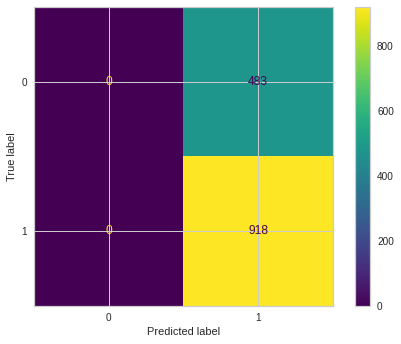

In [30]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [31]:
print('Modelo Regressão Logísitca')
lr_metrics = {
    'Acurácia': accuracy_score(y_test, y_pred),
    'Precisão': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
lr_metrics

Modelo Regressão Logísitca


{'Acurácia': 0.6552462526766595,
 'Precisão': 0.6552462526766595,
 'Recall': 1.0,
 'F1 Score': 0.7917205692108666}

In [32]:
classifier = SVC().fit(X_train, y_train)

In [33]:
y_pred = classifier.predict(X_test)

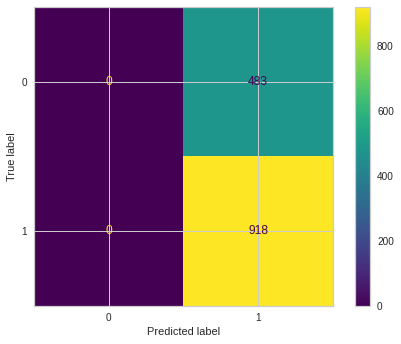

In [34]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [35]:
print('Modelo SVM')
svm_metrics = {
    'Acurácia': accuracy_score(y_test, y_pred),
    'Precisão': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
svm_metrics

Modelo SVM


{'Acurácia': 0.6552462526766595,
 'Precisão': 0.6552462526766595,
 'Recall': 1.0,
 'F1 Score': 0.7917205692108666}

In [36]:
pd.DataFrame([lr_metrics, svm_metrics])

,Acurácia,Precisão,Recall,F1 Score
0,0.655246,0.655246,1.0,0.791721
1,0.655246,0.655246,1.0,0.791721


In [37]:
X_proj = PCA(n_components=.95).fit_transform(X)

In [38]:
X_proj.shape[1]

1

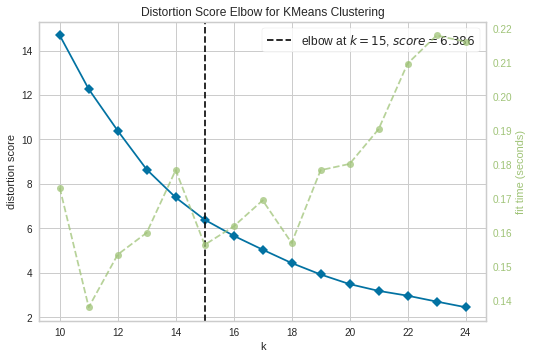

In [39]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X_proj)
visualizer.show() 

In [40]:
k = 15
kmeans = KMeans(n_clusters=k).fit(X_proj)

In [41]:
start = time.time()
X_tsne = TSNE(n_components=2).fit_transform(X_proj)
duration = time.time() - start

In [42]:
print('%s segundos' % duration)

25.706962823867798 segundos


In [43]:
palette = Category20[k]

In [44]:
def scatter_plot(X, labels):
    scatter_plot = figure(plot_width=1000, plot_height=500)
    scatter_plot.circle(X[:, 0], X[:, 1], size=10, line_color=[palette[l] for l in labels], fill_color=[palette[l] for l in labels], fill_alpha=.8)
    show(scatter_plot)

scatter_plot(X_tsne, kmeans.labels_)

In [45]:
start = time.time()
X_umap = umap.UMAP().fit_transform(X_proj)
duration = time.time() - start

In [46]:
print('%s segundos' % duration)

28.541266441345215 segundos


In [47]:
scatter_plot(X_umap, kmeans.labels_)

**Referências**

[NLPL word embeddings repository](http://vectors.nlpl.eu/repository/#)